### Goal
The goal here is to understand what might have gone wrong with the sequencing  
run on 10.8.2018.

In [1]:
%reload_ext autoreload
%autoreload 2

In [3]:
from util import parallel, nonparallel
import time

#parallel()
start = time.time()
parallel()
end = time.time()
print("Elapsed fast (after compilation) = %s" % (end - start))
fast = end - start
start = time.time()
nonparallel()
end = time.time()
print("Elapsed slow (after compilation) = %s" % (end - start))
slow = end - start
print('Fast way is %i times faster' % (slow / fast))


Elapsed fast (after compilation) = 7.581710815429688e-05
Elapsed slow (after compilation) = 3.4396097660064697
Fast way is 45367 times faster


In [12]:
from util import go_slow, go_fast
import time

#parallel()
start = time.time()
go_fast(10)
end = time.time()
print("Elapsed fast (after compilation) = %s" % (end - start))
fast = end - start
start = time.time()
go_slow(10)
end = time.time()
print("Elapsed slow (after compilation) = %s" % (end - start))
slow = end - start
print('Fast way is %i times faster' % (slow / fast))

Elapsed fast (after compilation) = 0.00010132789611816406
Elapsed slow (after compilation) = 0.0013248920440673828
Fast way is 13 times faster


### Read lengths of Fastq

In [45]:
from util import read_lengths
from time import time
from numba import jit, prange, njit

file1 = 'samples/208.fastq'
file2 = 'samples/245.fastq'

fastqs = {'208':file1, '245':file2}
limit = 200 # number of sequences to analyze

lengths = read_lengths(fastqs, limit)
df = pd.melt(pd.DataFrame(lengths)).rename(columns={'variable':'Sample','value':'Length'})

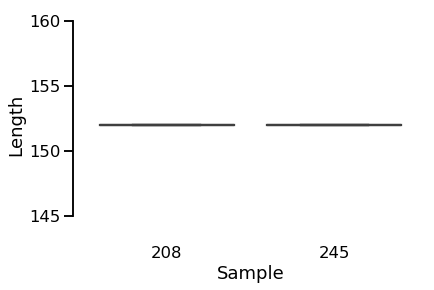

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("talk")
plt.figure()
ax = sns.boxplot(x='Sample', y='Length', data=df)
sns.despine(offset=10, trim=True, bottom=True)
plt.tick_params(bottom=False)

In [73]:
from util import read_lengths
from time import time
from numba import jit, prange, njit

file1 = 'samples/155_finalOutput.fastq'
file2 = 'samples/245_finalOutput.fastq'

fastqs = {'Old':file1, 'New':file2}
limit = 84 # number of sequences to analyze

lengths = read_lengths(fastqs, limit)
df = pd.melt(pd.DataFrame(lengths)).rename(columns={'variable':'Sample','value':'Length'})

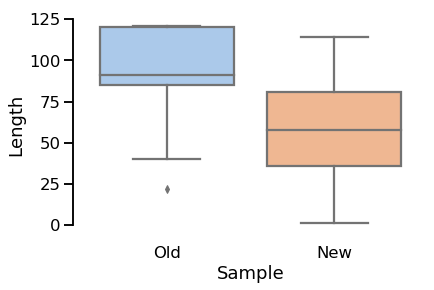

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("talk")
sns.set_palette("pastel")
plt.figure()
ax = sns.boxplot(x='Sample', y='Length', data=df)
sns.despine(offset=10, trim=True, bottom=True)
plt.tick_params(bottom=False)